Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017год. Данные до 2016 года. 

*План работы*
1) Изучение общей информации

2) Подготовка данных

3) Проведение исследовательского анализа данных

4) Составление портрета пользователя каждого региона

5) Проверьте гипотез

6) Общий вывод

## Изучение общей информации

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


*Все столбцы нужно привести к нижнему регистру, изменить тип данных User_Score и Year_of_Release, заполним пропуски. В датасете встречается аббревиатура tbd, означающее, что данной игре дано меньше минимального количества оценок для точного определения общей средней оценки, её заменим нулём*

## Подготовка данных

In [4]:
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
games['year_of_release'] = games['year_of_release'].fillna(games['year_of_release'].median())
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())
games.loc[games['user_score'] == 'tbd', 'user_score'] = 0
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

In [6]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*Подсчитаем суммарные продажи во всех регионах*

In [7]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,NaN,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,6.9,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,6.9,NaN,0.01


## Проведение исследовательского анализа данных

*Узнаем сколько игр выпускалось в разные годы*

In [8]:
games.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


*Посмотрим, как менялись продажи по платформам*

In [9]:
top_platform = games.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').reset_index()
top_platform.sort_values('sales', ascending=False)

,platform,sales
16,PS2,1062.33
28,X360,885.66
26,Wii,828.44
17,PS3,803.97
4,DS,746.86
15,PS,689.95
6,GBA,310.12
18,PS4,265.79
19,PSP,252.63
29,XB,249.02


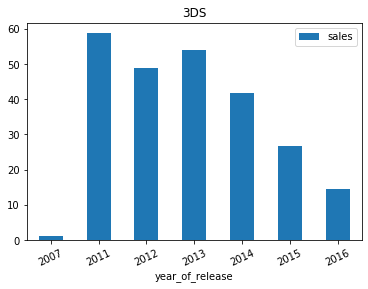

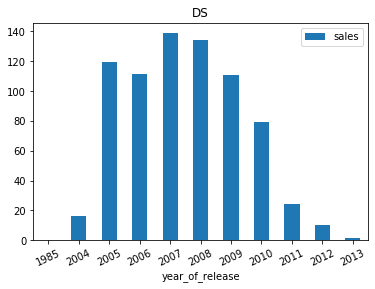

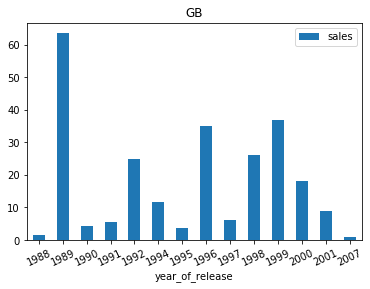

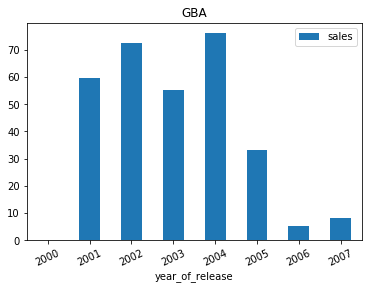

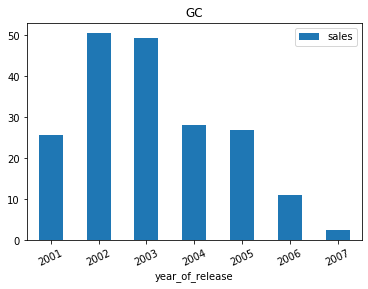

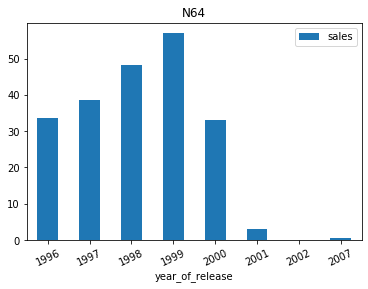

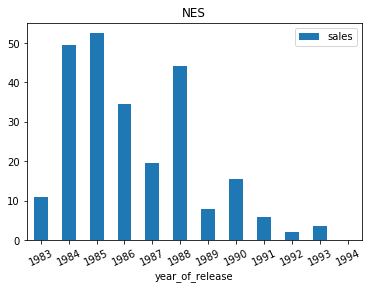

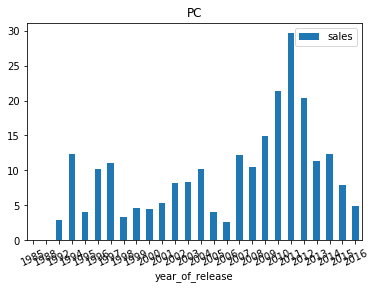

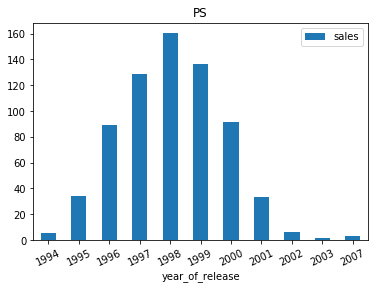

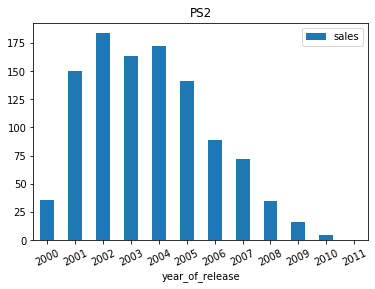

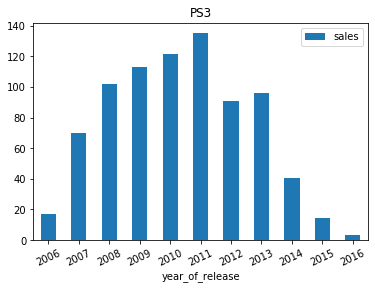

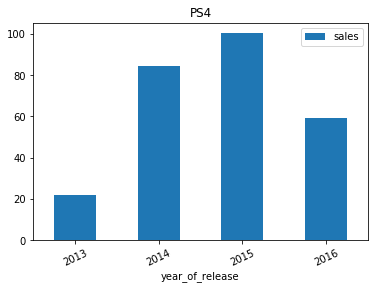

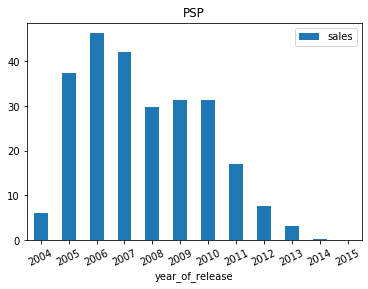

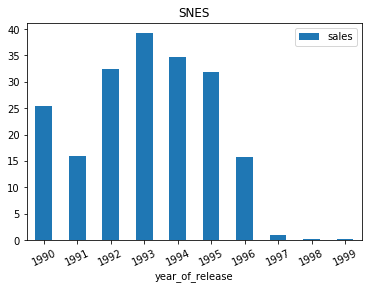

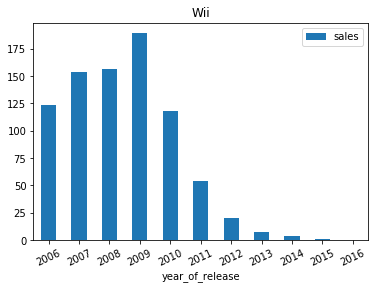

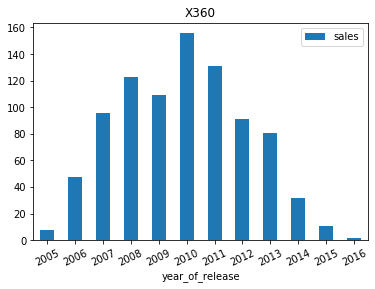

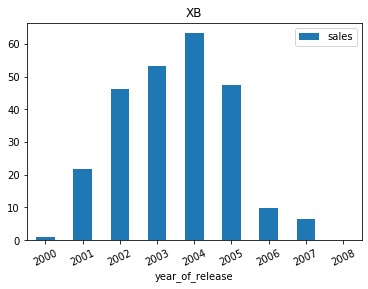

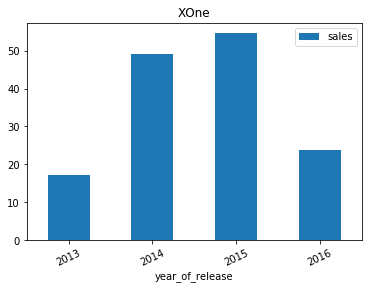

In [10]:
data = list(top_platform.query('sales > 100').sort_values(by ='sales', ascending = False)['platform'])
platform_year_sales = games.pivot_table(index = ['platform','year_of_release'], values = 'sales', aggfunc = 'sum').reset_index()
for name, group_data in platform_year_sales.groupby('platform'):
    if name in data:
        group_data.plot(x='year_of_release', y='sales', kind = 'bar', title = name, rot = 25)
        plt.show()

*Расцвет игропрома пришелся на 2006-07 года, высокий доход консоли приносят 4 года из срока жизни, а новое поколение консолей выпускают в среднем каждые 7 лет. PC гейминг всегда есть и будет. Также отметим, что портативные консоли теряют рынок, кроме Nintendo3DS. Из этого сделаем вывод, что актуальным периодом будем считать последние два года*

*Узнаем какие платформы лидируют по продажам*

In [11]:
df = games.query('year_of_release >= 2015')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,6.9,NaN,12.25
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71.0,6.9,NaN,6.70
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,71.0,6.9,NaN,6.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,NaN,0.01


In [12]:
df.pivot_table(index = ['platform','year_of_release'], values = 'sales', aggfunc = 'sum').reset_index()

,platform,year_of_release,sales
0,3DS,2015,26.75
1,3DS,2016,14.50
2,PC,2015,7.93
3,PC,2016,4.89
4,PS3,2015,14.70
5,PS3,2016,3.23
6,PS4,2015,100.44
7,PS4,2016,59.01
8,PSP,2015,0.12
9,PSV,2015,5.93


*Безоговорочным лидером за последний год является PS4. Следом идет XOne,3DS. Предыдущие поколение консолей теряют продажи большими темпами. PS4, XOne и 3DS - потенциально прибыльные платформы*

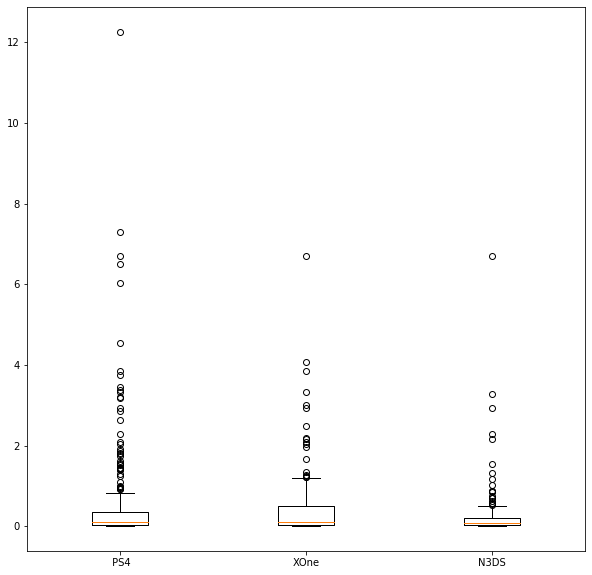

In [13]:
PS4 = df.loc[df.platform == 'PS4']['sales']
XOne = df.loc[df.platform == 'XOne']['sales']
N3DS = df.loc[df.platform == '3DS']['sales']

labels = [' PS4', 'XOne', 'N3DS']
plt.figure(figsize=(10,10))
plt.boxplot([PS4,XOne,N3DS], labels=labels)
plt.show()

*Медианное значение каждой платформы смещено к нижниму квартилю и расположено примерно на сто тысяч проданных копий. Верхние усы ящика на отметках 800 тыс.,1300тыс., 500тыс. Показатели выше считаются выбросами.*

*Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Посчитаем корреляцию между отзывами и продажами*

In [14]:
PS4_sales = df.loc[df.platform == 'PS4']['sales']
PS4_user_score = df.loc[df.platform == 'PS4']['user_score']
PS4_critic_score = df.loc[df.platform == 'PS4']['critic_score']
XOne_sales = df.loc[df.platform == 'XOne']['sales']
XOne_user_score = df.loc[df.platform == 'XOne']['user_score']
XOne_critic_score = df.loc[df.platform == 'XOne']['critic_score']
N3DS_sales = df.loc[df.platform == '3DS']['sales']
N3DS_user_score = df.loc[df.platform == '3DS']['user_score']
N3DS_critic_score = df.loc[df.platform == '3DS']['critic_score']

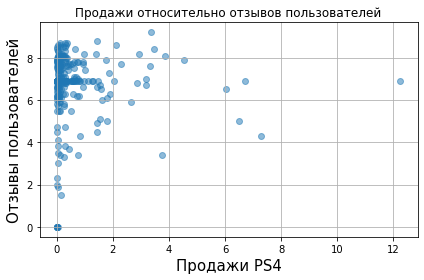

In [15]:
fig, ax = plt.subplots()
ax.scatter(PS4_sales, PS4_user_score, alpha=0.5)

ax.set_xlabel('Продажи PS4', fontsize=15)
ax.set_ylabel('Отзывы пользователей', fontsize=15)
ax.set_title('Продажи относительно отзывов пользователей')

ax.grid(True)
fig.tight_layout()

plt.show()

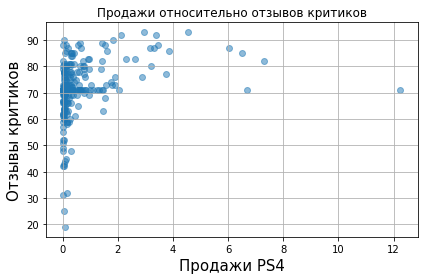

In [16]:
fig, ax = plt.subplots()
ax.scatter(PS4_sales, PS4_critic_score, alpha=0.5)

ax.set_xlabel('Продажи PS4', fontsize=15)
ax.set_ylabel('Отзывы критиков', fontsize=15)
ax.set_title('Продажи относительно отзывов критиков')

ax.grid(True)
fig.tight_layout()

plt.show()

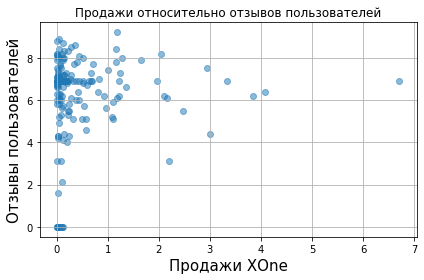

In [17]:
fig, ax = plt.subplots()
ax.scatter(XOne_sales, XOne_user_score, alpha=0.5)

ax.set_xlabel('Продажи XOne', fontsize=15)
ax.set_ylabel('Отзывы пользователей', fontsize=15)
ax.set_title('Продажи относительно отзывов пользователей')

ax.grid(True)
fig.tight_layout()

plt.show()

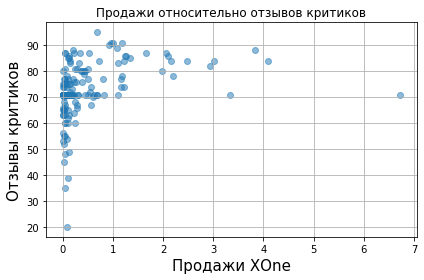

In [18]:
fig, ax = plt.subplots()
ax.scatter(XOne_sales, XOne_critic_score, alpha=0.5)

ax.set_xlabel('Продажи XOne', fontsize=15)
ax.set_ylabel('Отзывы критиков', fontsize=15)
ax.set_title('Продажи относительно отзывов критиков')

ax.grid(True)
fig.tight_layout()

plt.show()

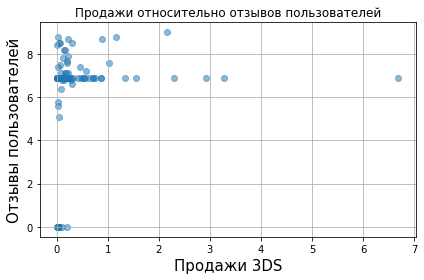

In [19]:
fig, ax = plt.subplots()
ax.scatter(N3DS_sales, N3DS_user_score, alpha=0.5)

ax.set_xlabel('Продажи 3DS', fontsize=15)
ax.set_ylabel('Отзывы пользователей', fontsize=15)
ax.set_title('Продажи относительно отзывов пользователей')

ax.grid(True)
fig.tight_layout()

plt.show()

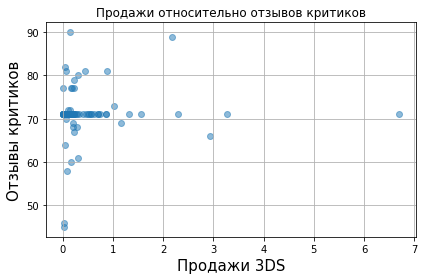

In [20]:
fig, ax = plt.subplots()
ax.scatter(N3DS_sales, N3DS_critic_score, alpha=0.5)

ax.set_xlabel('Продажи 3DS', fontsize=15)
ax.set_ylabel('Отзывы критиков', fontsize=15)
ax.set_title('Продажи относительно отзывов критиков')

ax.grid(True)
fig.tight_layout()

plt.show()

In [21]:
PS4_sales.corr(PS4_user_score)

0.002884971780179076

In [22]:
PS4_sales.corr(PS4_critic_score)

0.29568115793396754

In [23]:
XOne_sales.corr(XOne_user_score)

0.08091212347379426

In [24]:
XOne_sales.corr(XOne_critic_score)

0.33667953113617205

In [25]:
N3DS_sales.corr(N3DS_user_score)

0.12947585572523893

In [26]:
N3DS_sales.corr(N3DS_critic_score)

0.071840617194795

*Средний рейтинг у пользователей и критиков равен 7 и 70, соответсвенно.Отзывы имеют положительную корреляцию с продажами. Можно сделать вывод, что высокие оценки критиков повышают продажи PS4 и XOne. В случае с N3DSБ наоборот - высокие продажи обусловленны положительными оценками пользователей*


*Посмотрим на общее распределение игр по жанрам по среднему значению*

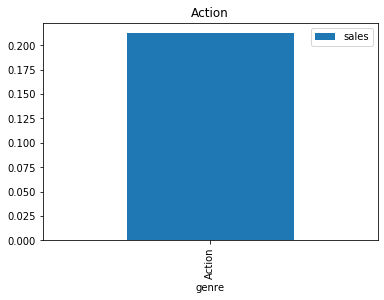

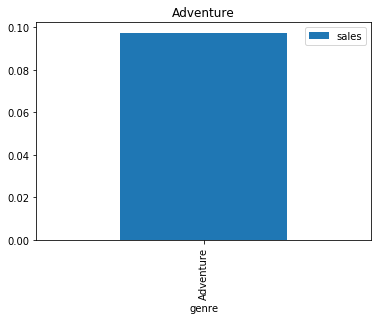

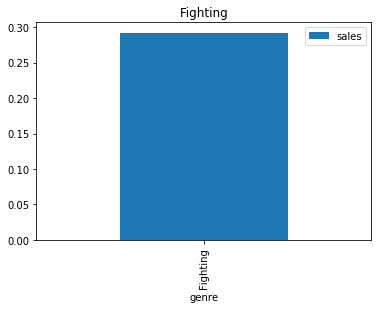

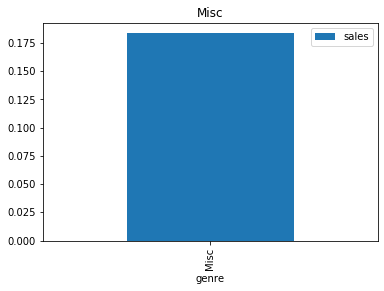

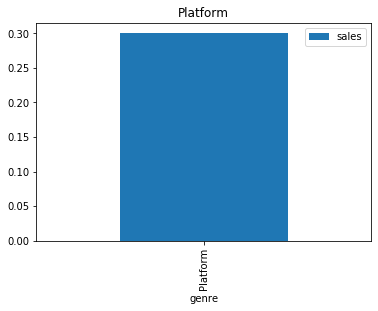

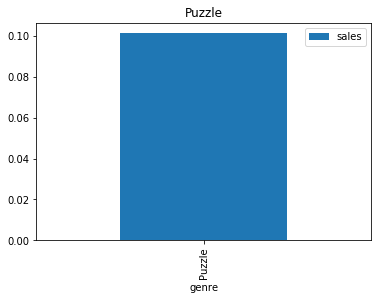

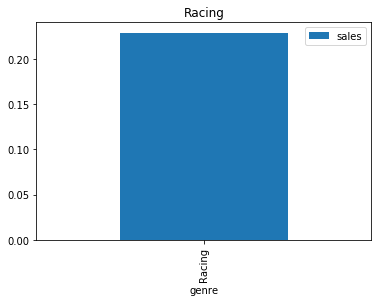

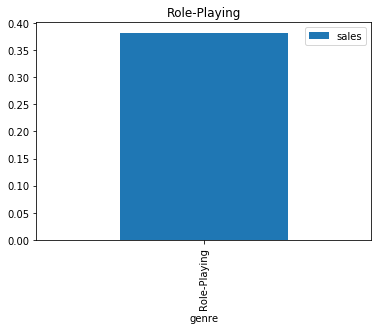

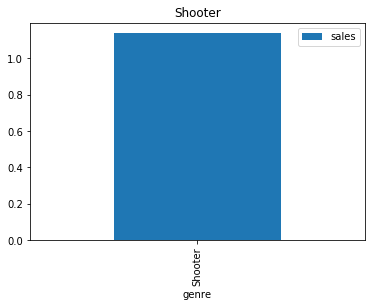

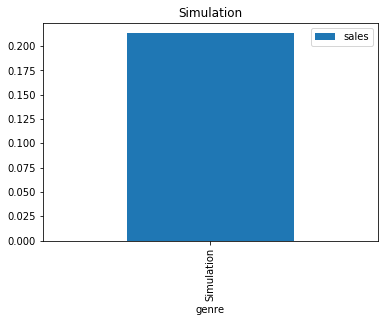

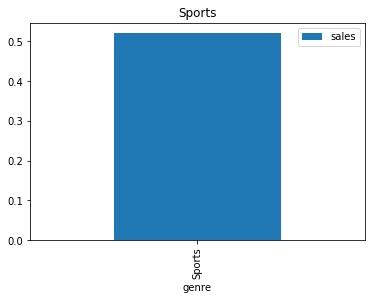

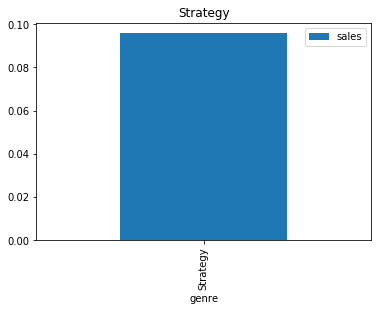

In [27]:
genre_sales = df.pivot_table(index = 'genre', values = 'sales', aggfunc = 'mean').reset_index()
for name, group_data in genre_sales.groupby('genre'):
        group_data.plot(x='genre', y='sales', kind = 'bar', title = name)
        plt.show()


*Shooter имеет самые высокие продажи, Puzzle самые низкие. Жанры, имеющие высокие продажи - Shooter,Sports,Role-Playing*

## Составление портрета пользователя каждого региона


Определим для пользователя каждого региона самые популярные платформы (топ-5)

In [28]:
NA_platform = df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
NA_top5_platform = NA_platform.sort_values('na_sales', ascending = False).reset_index().head(5)
NA_top5_platform

,platform,na_sales
0,PS4,63.86
1,XOne,50.30
2,3DS,10.31
3,WiiU,8.86
4,X360,8.05


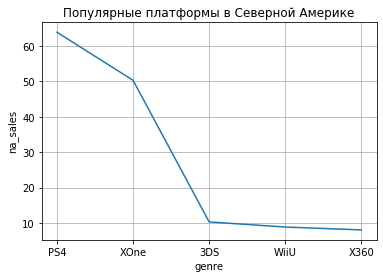

In [52]:
fig, ax = plt.subplots()
ax.plot(NA_top5_platform['platform'], NA_top5_platform['na_sales'])
ax.set(xlabel='genre', ylabel='na_sales',
       title='Популярные платформы в Северной Америке')
ax.grid()
plt.show()

In [29]:
EU_platform = df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
EU_top5_platform = EU_platform.sort_values('eu_sales', ascending = False).reset_index().head(5)
EU_top5_platform

,platform,eu_sales
0,PS4,83.54
1,XOne,28.10
2,PC,9.10
3,3DS,7.39
4,PS3,7.30


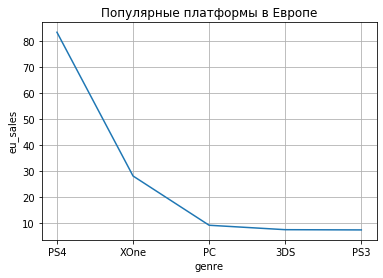

In [51]:
fig, ax = plt.subplots()
ax.plot(EU_top5_platform['platform'], EU_top5_platform['eu_sales'])
ax.set(xlabel='genre', ylabel='eu_sales',
       title='Популярные платформы в Европе')
ax.grid()
plt.show()

In [30]:
JP_platform = df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
JP_top5_platform = JP_platform.sort_values('jp_sales', ascending = False).reset_index().head(5)
JP_top5_platform

,platform,jp_sales
0,3DS,23.55
1,PS4,12.05
2,PSV,8.41
3,PS3,4.97
4,WiiU,4.12


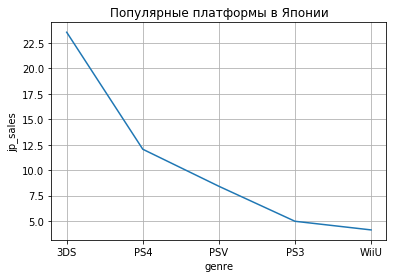

In [50]:
fig, ax = plt.subplots()
ax.plot(JP_top5_platform['platform'], JP_top5_platform['jp_sales'])
ax.set(xlabel='genre', ylabel='jp_sales',
       title='Популярные платформы в Японии')
ax.grid()
plt.show()

*В европейском и американском сегменте лидирует PS4. Разница в продажах между PS4 и XOne на этих рынках объясняется тем, что XOne американского производства. В Японии популярность имеют исключительно местные консоли. Также можно отметить лидирующую позицию у портативной консоли*

*Определим для пользователя каждого региона самые популярные жанры (топ-5)*

In [31]:
NA_genres = df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
NA_top5_genres = NA_genres.sort_values('na_sales', ascending = False).reset_index().head(5)
NA_top5_genres

,genre,na_sales
0,Shooter,48.18
1,Action,33.68
2,Sports,26.31
3,Role-Playing,19.82
4,Misc,5.58


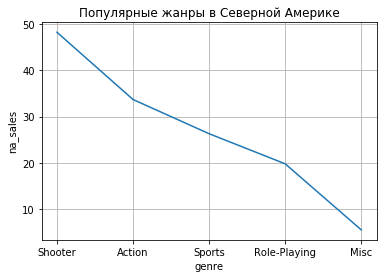

In [49]:
fig, ax = plt.subplots()
ax.plot(NA_top5_genres['genre'], NA_top5_genres['na_sales'])
ax.set(xlabel='genre', ylabel='na_sales',
       title='Популярные жанры в Северной Америке')
ax.grid()
plt.show()

In [32]:
EU_genres = df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
EU_top5_genres = EU_genres.sort_values('eu_sales', ascending = False).reset_index().head(5)
EU_top5_genres

,genre,eu_sales
0,Shooter,40.28
1,Action,34.82
2,Sports,27.82
3,Role-Playing,17.21
4,Racing,6.52


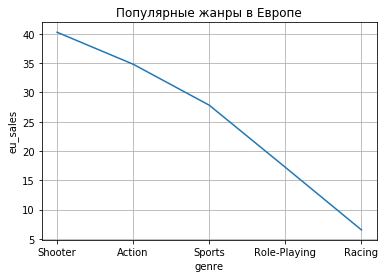

In [48]:
fig, ax = plt.subplots()
ax.plot(EU_top5_genres['genre'], EU_top5_genres['eu_sales'])
ax.set(xlabel='genre', ylabel='eu_sales',
       title='Популярные жанры в Европе')
ax.grid()
plt.show()

In [33]:
JP_genres = df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
JP_top5_genres = JP_genres.sort_values('jp_sales', ascending = False).reset_index().head(5)
JP_top5_genres

,genre,jp_sales
0,Action,23.05
1,Role-Playing,13.41
2,Shooter,3.79
3,Misc,3.19
4,Adventure,2.22


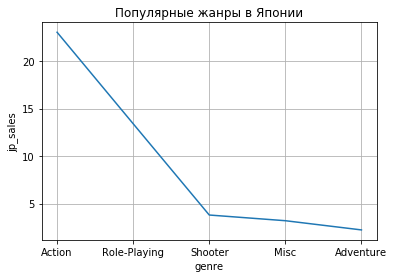

In [47]:
fig, ax = plt.subplots()
ax.plot(JP_top5_genres['genre'], JP_top5_genres['jp_sales'])
ax.set(xlabel='genre', ylabel='jp_sales',
       title='Популярные жанры в Японии')
ax.grid()
plt.show()

*В топ5 попали жанры, имеющие высокие продажи по всему актуальному периоду. Различия в Японии обусловлено культурой сраны в поп-сегменте*

*Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе*

In [34]:
np.var(df.query('rating == rating')['sales'], ddof=1)

0.6734552680870329

In [35]:
np.var(df.query('rating != rating')['sales'], ddof=1)

0.6397385401437622

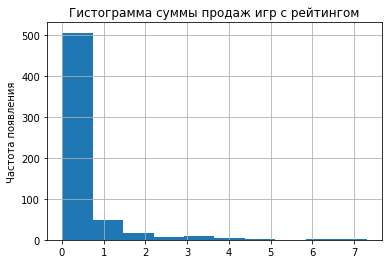

In [36]:
df.query('rating == rating')['sales'].hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма суммы продаж игр с рейтингом')
plt.grid(True)
plt.show()

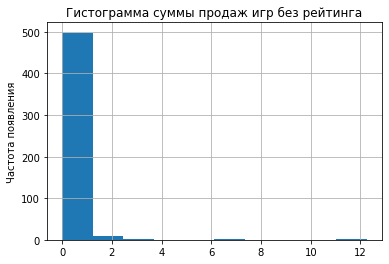

In [37]:
df.query('rating != rating')['sales'].hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма суммы продаж игр без рейтинга')
plt.grid(True)
plt.show()

H_0: продажи игр, у которых есть рейтинг == продажам игр, у которых нет рейтинга

H_1: продажи игр, у которых есть рейтинг != продажам игр, у которых нет рейтинга

In [38]:

alpha = 0.05 

results = st.ttest_ind(df.query('rating == rating')['sales'], df.query('rating != rating')['sales'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.1398498722921956e-05
Отвергаем нулевую гипотезу


*Из этого можем сделать вывод, что рейтинг влияет на продажи игр*

## Проверка гипотез

*Проверим гипотезу, что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

In [39]:
np.var(df.query('platform == "XOne"')['user_score'], ddof=1)

4.272399538272851

In [40]:
np.var(df.query('platform == "PC"')['user_score'], ddof=1)

4.0805741224794625

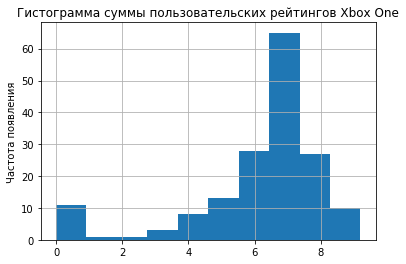

In [41]:
df.query('platform == "XOne"')['user_score'].hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма суммы пользовательских рейтингов Xbox One')
plt.grid(True)
plt.show()

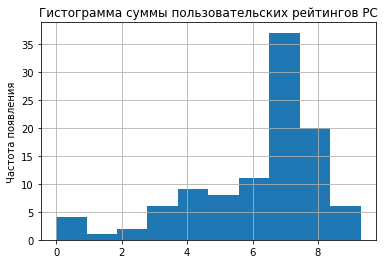

In [42]:
df.query('platform == "PC"')['user_score'].hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма суммы пользовательских рейтингов РС')
plt.grid(True)
plt.show()

Н_0: Пользовательские рейтинги Xbox One == Пользовательским рейтингам PC

Н_1: Пользовательские рейтинги Xbox One != Пользовательским рейтингам PC

In [43]:

alpha = 0.05 

results = st.ttest_ind(df.query('platform == "XOne"')['user_score'], df.query('platform == "PC"')['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.8786682268537087
Не получилось отвергнуть нулевую гипотезу


*Проверим гипотезу, что cредние пользовательские рейтинги жанров Action и Sports разные*

In [44]:
np.var(df.query('genre == "Action"')['user_score'], ddof=1)

3.9562525225273837

In [45]:
np.var(df.query('genre == "Sports"')['user_score'], ddof=1)

5.657009345794392

Н_0: Пользовательские рейтинги Action == Пользовательским рейтингам Sports

Н_1: Пользовательские рейтинги Action != Пользовательским рейтингам Sports

In [46]:
alpha = 0.05 

results = st.ttest_ind(df.query('genre == "Action"')['user_score'], df.query('genre == "Sports"')['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.271191601995669e-09
Отвергаем нулевую гипотезу


## Общий вывод

### После анализа можем сделать вывод, что успешными платформами являются PlayStation4, Xbox One, Nintendo 3DS. На успех влияют высокие отзывы критиков, жанр игры, рейтинг.  Можно выделить такие жанры, как Shooter,Action,Sports,Role-Playing. Пользовательский успех также зависит от региона продаж. 